<a href="https://colab.research.google.com/github/GUESSNAD/Automated-recognition-of-optical-image-based-potato-leaf-blight-diseases-using-Deep-Learning/blob/master/svm_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [12]:
# Chargez et pré-traitez vos données
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

In [13]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Plantvillagepotato",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [24]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [2]:
# Montez votre Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:



# Divisez les données en ensembles d'entraînement, de validation et de test
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
# Pré-traitez les données
train_features, train_labels = [], []
for images, labels in train_ds:
    train_features.extend(images.numpy())
    train_labels.extend(labels.numpy())

train_features = np.array(train_features)
train_labels = np.array(train_labels)

val_features, val_labels = [], []
for images, labels in val_ds:
    val_features.extend(images.numpy())
    val_labels.extend(labels.numpy())

val_features = np.array(val_features)
val_labels = np.array(val_labels)

test_features, test_labels = [], []
for images, labels in test_ds:
    test_features.extend(images.numpy())
    test_labels.extend(labels.numpy())

test_features = np.array(test_features)
test_labels = np.array(test_labels)

In [16]:
# Aplatir les images pour l'entrée SVM
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

In [17]:
# Normaliser les caractéristiques
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)


In [18]:
# Entraîner le modèle SVM
svm_model = SVC(kernel='linear')
svm_model.fit(train_features, train_labels)

SVC(kernel='linear')

In [19]:

# Évaluer le modèle SVM
val_predictions = svm_model.predict(val_features)
test_predictions = svm_model.predict(test_features)

print("Validation Accuracy:", accuracy_score(val_labels, val_predictions))
print("Test Accuracy:", accuracy_score(test_labels, test_predictions))
print("Classification Report (Validation):\n", classification_report(val_labels, val_predictions))
print("Classification Report (Test):\n", classification_report(test_labels, test_predictions))

Validation Accuracy: 0.978125
Test Accuracy: 0.9517045454545454
Classification Report (Validation):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       155
           1       0.97      0.99      0.98       147
           2       0.88      0.78      0.82        18

    accuracy                           0.98       320
   macro avg       0.95      0.92      0.93       320
weighted avg       0.98      0.98      0.98       320

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       151
           1       0.94      0.96      0.95       170
           2       0.96      0.74      0.84        31

    accuracy                           0.95       352
   macro avg       0.95      0.90      0.92       352
weighted avg       0.95      0.95      0.95       352



First image to predict


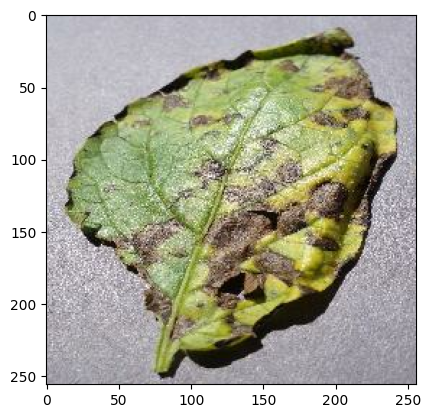

Actual label: Potato___Early_blight
Predicted label: Potato___Early_blight


In [28]:
for images_batch, labels_batch in val_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    plt.show()
    print("Actual label:", class_names[first_label])

    # Prédiction pour le modèle SVM
    batch_prediction = svm_model.predict(scaler.transform(images_batch.numpy().reshape(-1, IMAGE_SIZE * IMAGE_SIZE * CHANNELS)))
    print("Predicted label:", class_names[batch_prediction[0]])


First image to predict


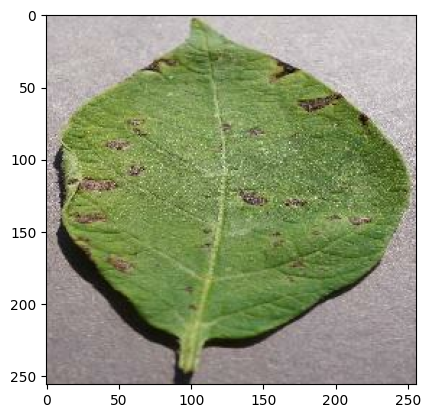

Actual label: Potato___Early_blight
Predicted label: Potato___Early_blight


In [30]:
for images_batch, labels_batch in val_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    plt.show()
    print("Actual label:", class_names[first_label])

    # Prédiction pour le modèle SVM
    batch_prediction = svm_model.predict(scaler.transform(images_batch.numpy().reshape(-1, IMAGE_SIZE * IMAGE_SIZE * CHANNELS)))
    print("Predicted label:", class_names[batch_prediction[0]])


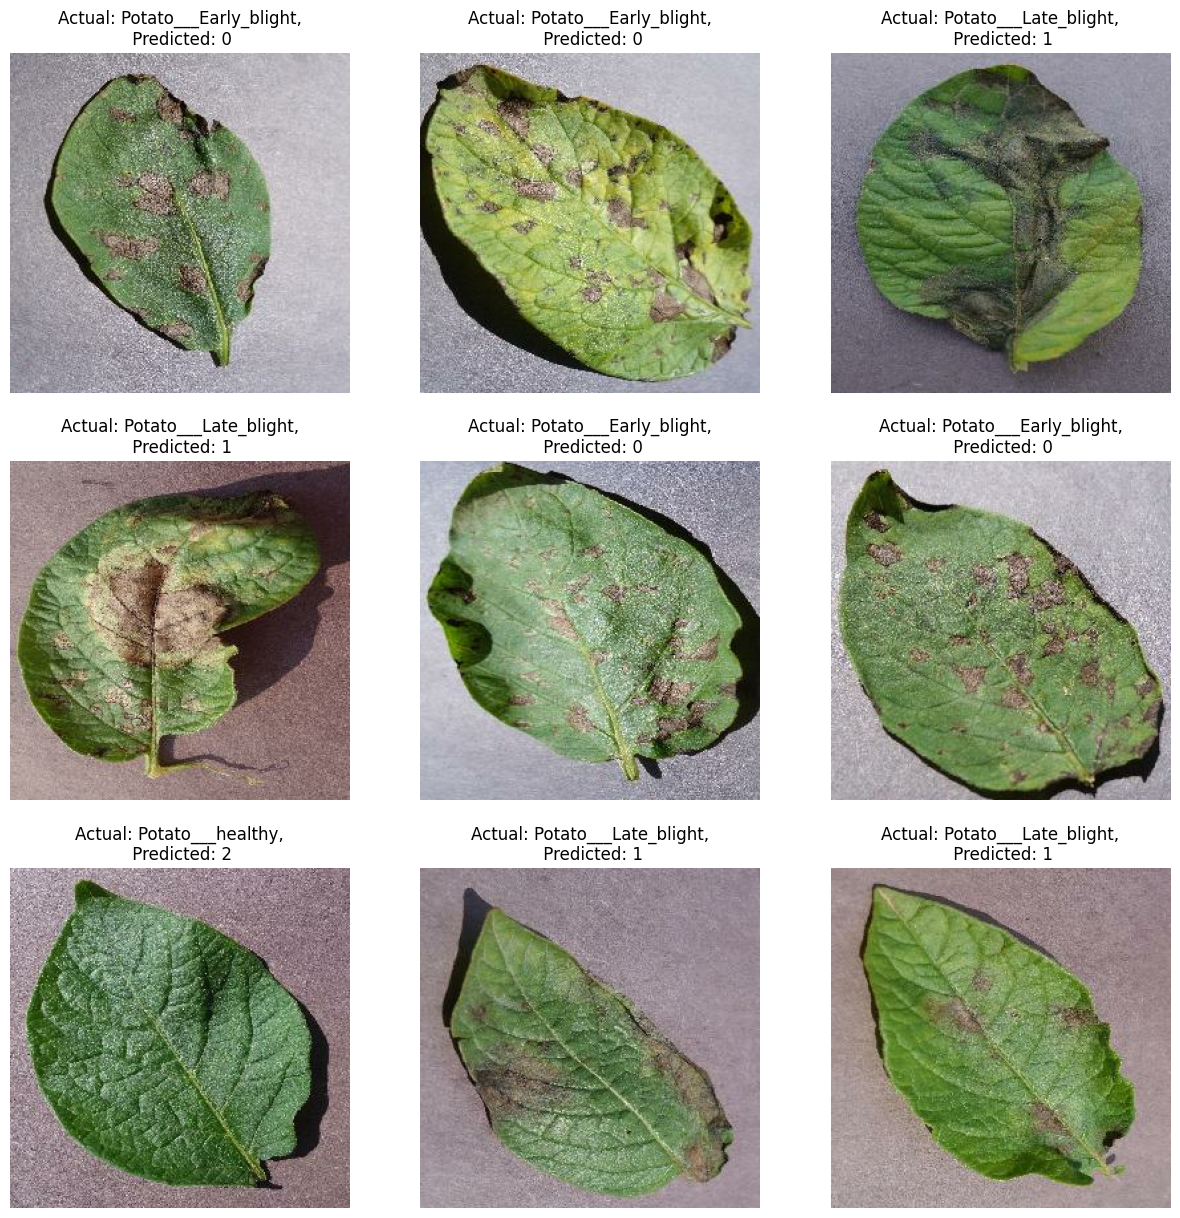

In [31]:
plt.figure(figsize=(15, 15))

for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Prédiction pour le modèle SVM
        predicted_class = svm_model.predict(scaler.transform(images[i].numpy().reshape(1, -1)))[0]
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        plt.axis("off")

plt.show()


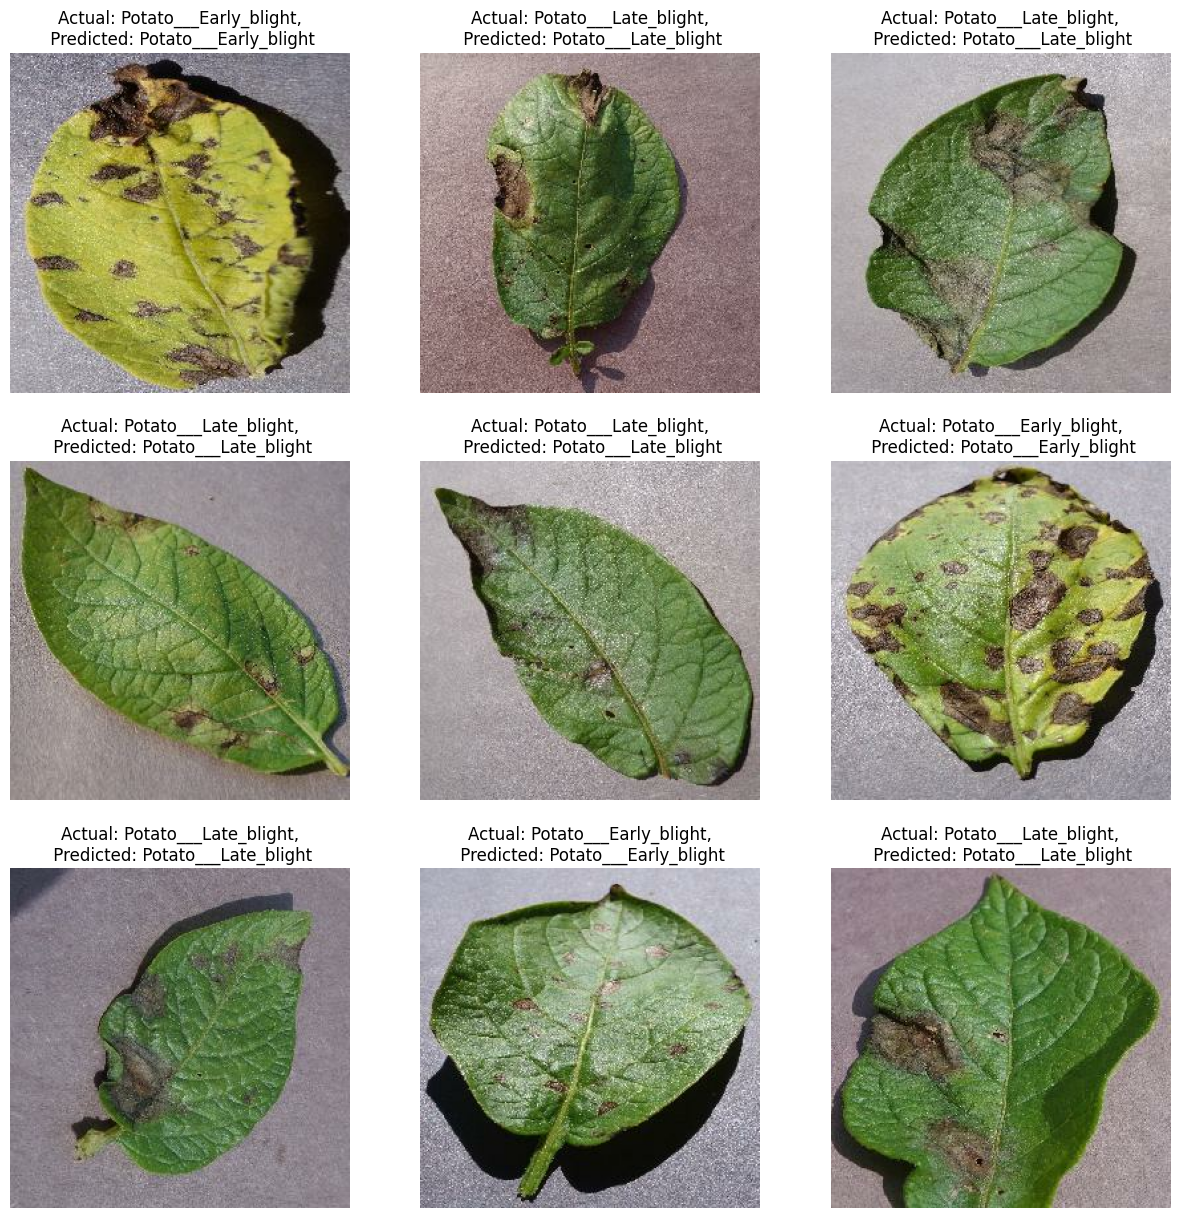

In [32]:
plt.figure(figsize=(15, 15))

for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Prédiction pour le modèle SVM
        predicted_class_index = svm_model.predict(scaler.transform(images[i].numpy().reshape(1, -1)))[0]
        predicted_class = class_names[predicted_class_index]
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        plt.axis("off")

plt.show()


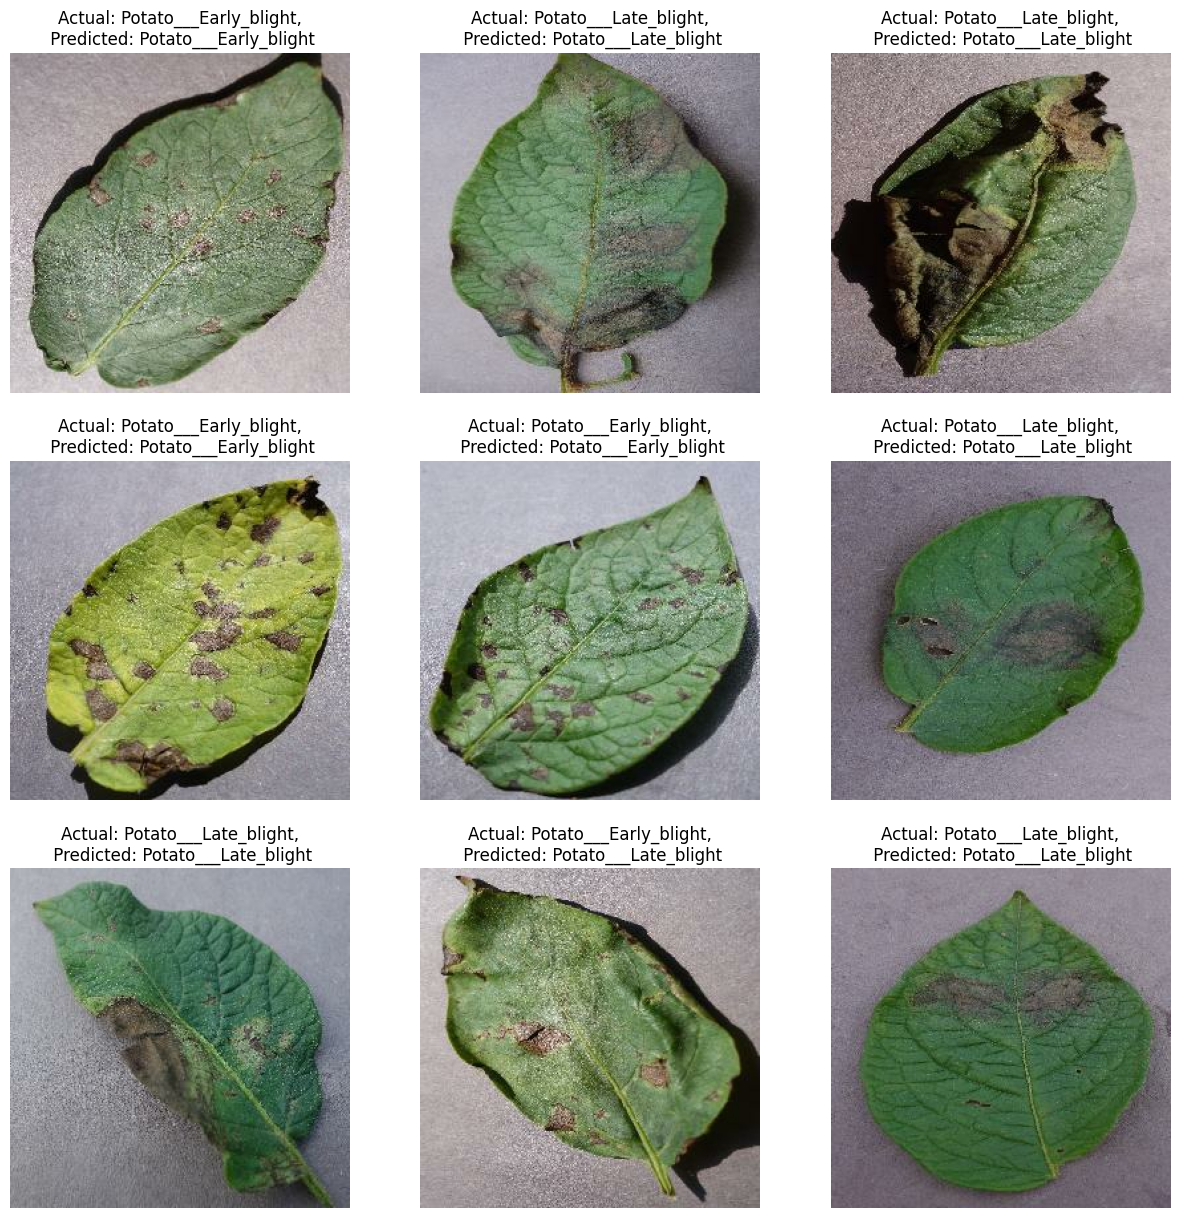

In [33]:
plt.figure(figsize=(15, 15))

for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Prédiction pour le modèle SVM
        predicted_class_index = svm_model.predict(scaler.transform(images[i].numpy().reshape(1, -1)))[0]
        predicted_class = class_names[predicted_class_index]
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        plt.axis("off")

plt.show()


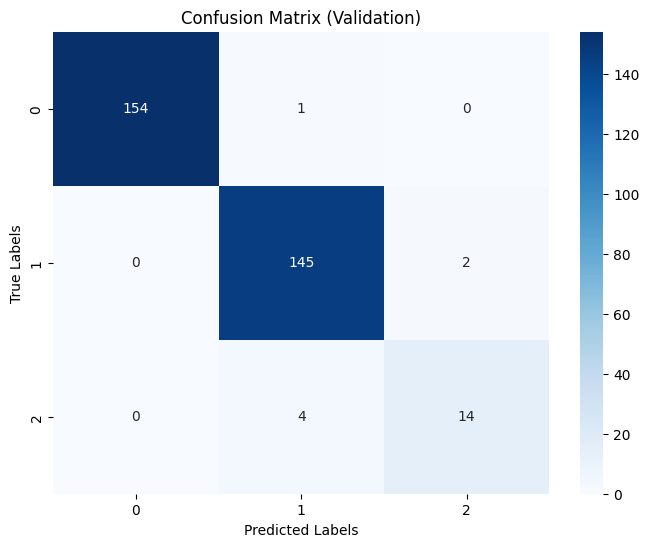

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion pour l'ensemble de validation
val_conf_matrix = confusion_matrix(val_labels, val_predictions)

# Afficher la matrice de confusion pour l'ensemble de validation
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Validation)')
plt.show()
